### File information

File: Project_Task3_Charts.ipynb

Name: Amie Davis

Date: 10/23/2020

Course: DSC640 - Data Presentation & Visualization

Assignment Number: 4.3

Purpose: Improve Visualizations for Blog Post

Usage: Python 3.7.6

Developed using Jupter Notebook 6.0.3


References: https://matplotlib.org/

## Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [2]:
# Load airline safety data into dataframe
air_saf_data = "../Data/airline-safety.csv" 
air_saf_df = pd.read_csv(air_saf_data)

# Show data
air_saf_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [34]:
# Load highway safety data into dataframe
fars_all_data = "../Data/NHTSA/FARS_ALL_CORRECTED.CSV" 
fars_all_df = pd.read_csv(fars_all_data)

# Show data
fars_all_df.head()
fars_all_df

,YEAR,STATE,COUNTY,FATALS,ST_CASE,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_POSBAC,A_D15_19,A_D16_19,A_D15_20,A_D16_20,A_D65PLS,A_D21_24,A_D16_24,A_DIST,A_DROWSY
0,2000,1,117,1,10001,1,4,2,2,1,...,3,2,2,2,2,2,2,2,2,2
1,2000,1,1,1,10002,1,4,1,2,4,...,1,2,2,2,2,2,2,2,2,2
2,2000,1,73,1,10003,1,4,2,2,4,...,3,2,2,2,2,1,2,2,2,2
3,2000,1,21,1,10004,1,4,1,2,4,...,3,2,2,2,2,2,2,2,2,2
4,2000,1,53,2,10005,1,4,1,2,1,...,3,1,1,1,1,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468410,1999,56,17,1,560158,1,8,1,2,1,...,3,2,2,2,2,2,2,2,2,1
1468411,1999,56,15,1,560159,1,8,1,2,1,...,3,1,1,1,1,2,2,1,1,1
1468412,1999,56,21,1,560160,1,8,1,1,3,...,2,2,2,2,2,2,2,2,2,2
1468413,1999,56,9,1,560161,1,8,1,2,4,...,2,2,2,2,2,2,2,2,2,2


## Calculate Totals

In [43]:
# Calculate fatality totals
Air_Fat_Tot = air_saf_df.fatalities_85_99.sum() + air_saf_df.fatalities_00_14.sum()
Hwy_Fat_Tot = fars_all_df.FATALS.sum()

# Create data frame to store totals
fatalities = {'Mode': ['Air','Hwy'],
              'Fatals': [Air_Fat_Tot, Hwy_Fat_Tot]}

fat_df = pd.DataFrame(fatalities, columns = ['Mode', 'Fatals'])
fat_df

,Mode,Fatals
0,Air,9404
1,Hwy,15333451


## Donut Chart

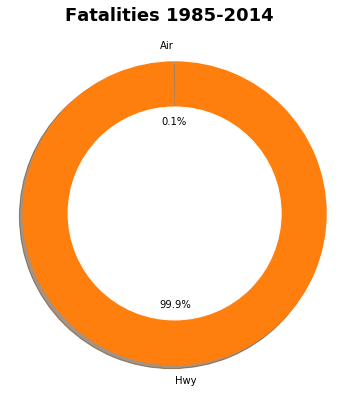

In [44]:
# Set figure and axes
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6, 6)
fig1.suptitle('Fatalities 1985-2014', fontsize=18, fontweight='bold')

# Set axes parameters
ax1.pie(fat_df.Fatals, 
        labels=fat_df.Mode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to turn pie into donut
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Show Plot
plt.show()